In [83]:
import os
import random
import numpy as np 
import pandas as pd
from itertools import combinations,combinations_with_replacement 
from PIL import Image

In [84]:
print(os.listdir("./"))
print(os.listdir("../"))
print(os.listdir("../Data/recognizing-faces-in-the-wild/"))

['.ipynb_checkpoints', 'EDA.ipynb', 'EDA_Image.ipynb', 'model.png', 'Siamese_Network.ipynb']
['Data', 'Modals', 'Notebooks']
['sample_submission.csv', 'test', 'test.zip', 'train', 'train.zip', 'train_relationships.csv']


In [85]:
DATA_BASE_PATH="../Data/recognizing-faces-in-the-wild/"
DATA_BASE_PATH

'../Data/recognizing-faces-in-the-wild/'

In [86]:
FAMILIES_PATH=os.path.join(DATA_BASE_PATH, 'train')
FAMILIES_PATH

'../Data/recognizing-faces-in-the-wild/train'

In [87]:
#np.asarray(Image.open(FAMILIES_PATH +'/'+ member_1 +'/'+ image_1)),
#np.asarray(Image.open(FAMILIES_PATH +'/'+ member_2 +'/'+ image_2))


# Geneate Familiy Member Combination Pair

In [88]:
def get_family_members_image_combination(member_1, member_2):
    member_1_path=os.path.join(FAMILIES_PATH, member_1)
    member_2_path=os.path.join(FAMILIES_PATH, member_2)
    
    return_result = [
            (
                member_1 +'-'+ member_2 ,
                FAMILIES_PATH +'/'+ member_1 +'/'+ image_1, 
                FAMILIES_PATH +'/'+ member_2 +'/'+ image_2
            )   
            for image_1 in os.listdir(member_1_path)
            for image_2 in os.listdir(member_2_path)
           ]
    return random.choices(return_result, k=min(len(return_result), 2))  
    #return return_result

In [89]:
family_members_combination = [
    get_family_members_image_combination(family + '/' + pair[0], family + '/' + pair[1])
    for family in os.listdir(FAMILIES_PATH)
    for pair in combinations(os.listdir(os.path.join(FAMILIES_PATH, family)), 2)
]

family_members_combination = [val for sublist in family_members_combination for val in sublist]
#family_members_combination

In [90]:
family_members_combination_df = pd.DataFrame(family_members_combination, columns=['combination_pair_from_dir', 'left_image_path', 'right_image_path'])    
family_members_combination_df

,combination_pair_from_dir,left_image_path,right_image_path
0,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
1,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
2,F0002/MID1-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
3,F0002/MID1-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
4,F0002/MID2-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
5,F0002/MID2-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
6,F0005/MID1-F0005/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
7,F0005/MID1-F0005/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
8,F0005/MID1-F0005/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...
9,F0005/MID1-F0005/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...


# Reading Training .csv File

In [91]:
train_excel_df = pd.read_csv(os.path.join(DATA_BASE_PATH, 'train_relationships.csv'))
train_excel_df['combination_pair_from_excel'] = train_excel_df['p1'] +'-'+ train_excel_df['p2']
train_excel_df['is_related']=1
train_excel_df

,p1,p2,combination_pair_from_excel,is_related
0,F0002/MID1,F0002/MID3,F0002/MID1-F0002/MID3,1
1,F0002/MID2,F0002/MID3,F0002/MID2-F0002/MID3,1
2,F0005/MID1,F0005/MID2,F0005/MID1-F0005/MID2,1
3,F0005/MID3,F0005/MID2,F0005/MID3-F0005/MID2,1
4,F0009/MID1,F0009/MID4,F0009/MID1-F0009/MID4,1
5,F0009/MID1,F0009/MID3,F0009/MID1-F0009/MID3,1
6,F0009/MID1,F0009/MID2,F0009/MID1-F0009/MID2,1
7,F0009/MID1,F0009/MID6,F0009/MID1-F0009/MID6,1
8,F0009/MID2,F0009/MID4,F0009/MID2-F0009/MID4,1
9,F0009/MID2,F0009/MID6,F0009/MID2-F0009/MID6,1


# Merging the Two Dataframes

In [92]:
train_df= pd.merge(left=family_members_combination_df, right=train_excel_df, how='left',  left_on='combination_pair_from_dir', right_on='combination_pair_from_excel')
train_df = train_df.drop(['p1','p2','combination_pair_from_excel'], axis=1)
train_df['is_related'] = (train_df['is_related'].fillna(0)).astype(int)
train_df

,combination_pair_from_dir,left_image_path,right_image_path,is_related
0,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
1,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
2,F0002/MID1-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
3,F0002/MID1-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
4,F0002/MID2-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
5,F0002/MID2-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
6,F0005/MID1-F0005/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
7,F0005/MID1-F0005/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
8,F0005/MID1-F0005/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
9,F0005/MID1-F0005/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0


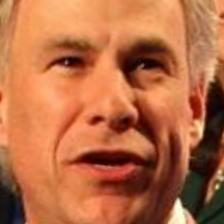

In [93]:
left_image_path=train_df['left_image_path'][0]
left_image=Image.open(left_image_path)
left_image    

In [94]:
left_image_data = np.asarray(left_image)
left_image_data.shape

(224, 224, 3)

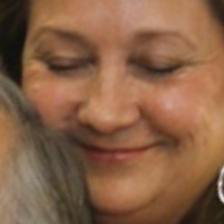

In [95]:
right_image_path=train_df['right_image_path'][0]
right_image=Image.open(right_image_path)
right_image    

In [96]:
right_image_data = np.asarray(right_image)
right_image_data.shape

(224, 224, 3)

In [97]:
left_image_data

array([[[135,  81,  35],
        [144,  92,  45],
        [158, 106,  59],
        ...,
        [244, 149, 101],
        [245, 151, 100],
        [247, 151, 101]],

       [[137,  83,  37],
        [149,  97,  50],
        [166, 114,  67],
        ...,
        [243, 151, 102],
        [244, 150,  99],
        [245, 149,  99]],

       [[142,  88,  42],
        [156, 104,  57],
        [175, 123,  76],
        ...,
        [244, 152, 103],
        [244, 149, 101],
        [241, 147,  96]],

       ...,

       [[ 20,  22,  19],
        [ 20,  22,  19],
        [ 20,  22,  19],
        ...,
        [ 35,  48,  28],
        [ 37,  50,  30],
        [ 38,  51,  31]],

       [[ 20,  22,  19],
        [ 21,  23,  20],
        [ 21,  23,  20],
        ...,
        [ 35,  48,  28],
        [ 37,  50,  30],
        [ 38,  51,  31]],

       [[ 21,  23,  20],
        [ 21,  23,  20],
        [ 21,  23,  20],
        ...,
        [ 34,  47,  27],
        [ 37,  50,  30],
        [ 38,  51,  31]]

In [98]:
merged=np.vstack((left_image_data,right_image_data))

In [99]:
merged.shape

(448, 224, 3)

In [100]:
merged1=np.empty((3,2))
merged1

array([[0.0e+000, 4.9e-324],
       [9.9e-324, 1.5e-323],
       [2.0e-323, 2.5e-323]])

In [101]:
merged1.shape

(3, 2)

In [102]:
merged1[0]

array([0.e+000, 5.e-324])

In [103]:
train_df.to_pickle("../Data/image_data.pkl")


In [104]:
import pickle
pickle_in = open("../Data/image_data.pkl","rb")
train_df_from_pickle = pickle.load(pickle_in)
pickle_in.close()

In [105]:
train_df_from_pickle

,combination_pair_from_dir,left_image_path,right_image_path,is_related
0,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
1,F0002/MID1-F0002/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
2,F0002/MID1-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
3,F0002/MID1-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
4,F0002/MID2-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
5,F0002/MID2-F0002/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
6,F0005/MID1-F0005/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
7,F0005/MID1-F0005/MID2,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,1
8,F0005/MID1-F0005/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0
9,F0005/MID1-F0005/MID3,../Data/recognizing-faces-in-the-wild/train/F0...,../Data/recognizing-faces-in-the-wild/train/F0...,0


In [106]:
train_df.shape[0]

12122